In [1]:
### import libraries ###
import spacy # NLP library in Python
import pandas as pd # data manipulation and analysis
from collections import Counter # for counting occurrences of elements
import de_core_news_sm # a small language model to process the text in German

import matplotlib.pyplot as plt # to create plots to visualize data
import seaborn as sns # data visualization
sns.set_theme(style="darkgrid") # theme for Seaborn plots

# german language model calls the function .load() to process the text and assign the processing to a variable
nlp = de_core_news_sm.load()

/Users/geniaviskovatykh/Desktop/UPF/Subjects/NLP/ZLA project/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/ny/dyq93n6d6rqfzrtjrp2j6mn00000gn/T/ipykernel_32906/1763459863.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data manipulation and analysis


In [3]:
# specify the file:
file = "data/Rammstein.txt"

# open and read the text of the file:
with open(file, "r", encoding="utf-8") as file:
    text = file.read().lower()

# process the text:  tokenization, PoS tagging, and NER and create 'doc' object that contains the processed text
doc = nlp(text)

In [4]:
data = {'word': [], 'frequency': [], 'length': []} # empty dictionary with three keys: 'word', 'frequency', and 'length'

for token in doc: # a loop that iterates over each token in the spaCy document

    # check if the token is not a stop word, not a punctuation mark, and not equal to a newline character:
    if not token.is_stop and not token.is_punct and not token.text == '\n':

        # remove single quotes from the text and assigns the result to the variable 'clean_word':
        clean_word = token.text.replace("'", "")

        # checks if the cleaned word is not already in the 'word' list of the dictionary:
        if clean_word not in data['word']:

            # add the cleaned word to the 'word' list, appends the frequency as 1 to the 'frequency' list,
            # and appends the length of the cleaned word to the 'length' list:
            data['word'].append(clean_word)
            data['frequency'].append(1)
            data['length'].append(len(clean_word))

            # if the cleaned word is already in the dictionary,
            # it finds the index of the word and increments its frequency:
        else:
            index = data['word'].index(clean_word)
            data['frequency'][index] += 1

# convert the 'data' dictionary into a pandas DataFrame:
df = pd.DataFrame(data)

# sort the DataFrame by the 'frequency' column in descending order:
df.sort_values(by = 'frequency', ascending = False, inplace = True)

# add a new column 'rank' to the DataFrame giving the rank of each word based on frequency:
df['rank'] = list(range(1, len(df) + 1))

# display the top 25 words by frequency along with their ranks:
df[:25]

,word,frequency,length,rank
47,links,37,5,1
10,herz,34,4,2
125,bäng,30,4,3
237,zwitter,30,7,4
63,sonne,26,5,5
146,mutter,25,6,6
421,zeig,24,4,7
52,zwo,22,3,8
0,liebe,21,5,9
50,rein,21,4,10


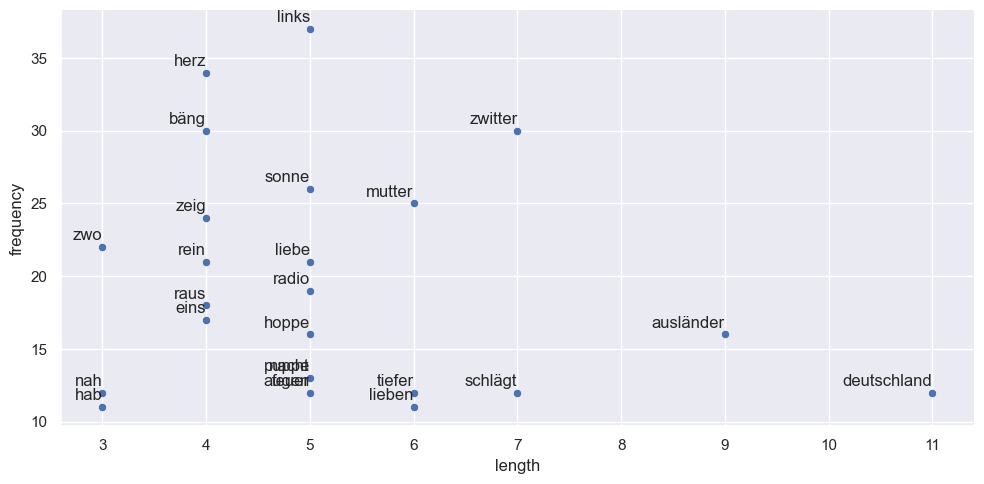

In [5]:
### create a scatter plot ###

# define the subset of top 25 words to display on the plot:
df_subset = df[:25]

# create a scatter plot to visualize the relationship between the length of words and their frequencies:
sns.relplot(x = 'length', y = 'frequency', data = df_subset, aspect = 2)

# annotate each point with corresponding words:
for i, row in df_subset.iterrows():
    plt.annotate(row['word'], (row['length'], row['frequency']),
                 textcoords = "offset points", xytext = (0,5), ha ='right')

# set x-axis ticks to integer values
plt.xticks(list(range(int(df_subset['length'].min()), int(df_subset['length'].max()) + 1)))

# display the plot
plt.show()